In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Primer Evento evaluativo de machine learning

En este primer ito evaluativo se predecirán los precios casa deacuerdo a un dataset dado. Para esto se utiliza los datos que proporciona la plataforma Kaggle.

## 1. Lectura y formateo

Leear el dataset y estandarisar los datos e indices.

In [118]:
df = pd.read_csv('data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [119]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [120]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].str.lower()
df

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,rl,65.0,8450,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,rl,62.0,7917,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,NaN,reg,lvl,allpub,...,0,NaN,mnprv,NaN,0,2,2010,wd,normal,210000
1457,1458,70,rl,66.0,9042,pave,NaN,reg,lvl,allpub,...,0,NaN,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,4,2010,wd,normal,142125


# 2. Normalización

Verifico si el dataframe tiene una distribución normal, sino, la normailizo.

<Axes: xlabel='saleprice', ylabel='Count'>

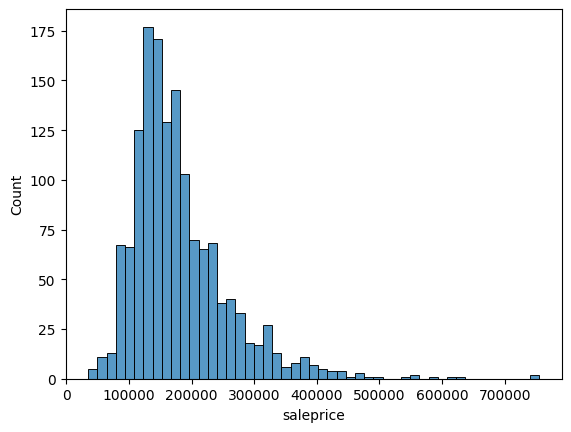

In [121]:
sns.histplot(df.saleprice)

In [122]:
price_logs = np.log1p(df.saleprice)

<Axes: xlabel='saleprice', ylabel='Count'>

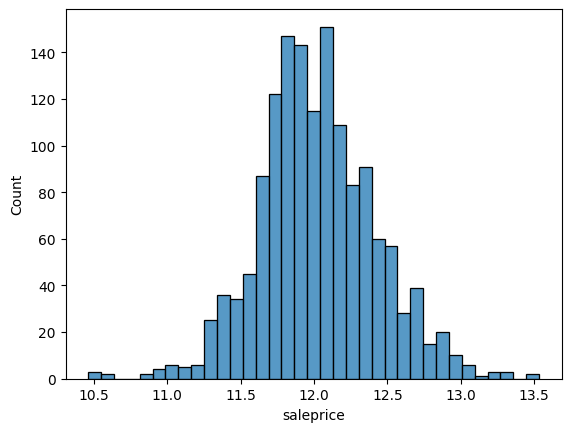

In [123]:
sns.histplot(price_logs)

In [124]:
print(df.saleprice.max())
print(df.saleprice.min())

755000
34900


## 3. EDA

Pido excusas por el análisis exploratorio, realmente fue la parte que no entendí, intenté realizarlo creando gráficos de bigote y la matriz del coeficiente de pearson pero no sabía que hacer con la información.

<Axes: ylabel='saleprice'>

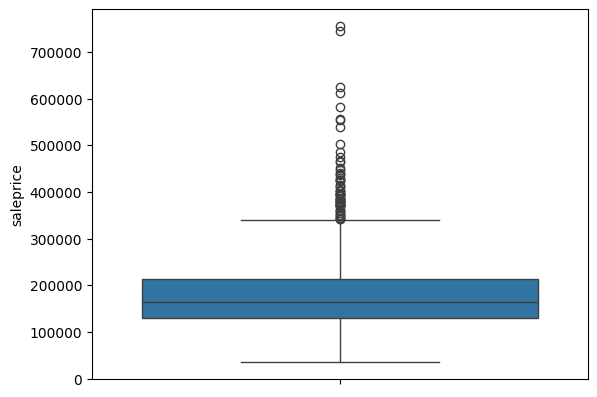

In [125]:
sns.boxplot(df.saleprice)

## 4. Tratamiento de los valores faltantes

Para esta sección se tuvo muy encuenta lo escrito en el archivo `data_description.txt` y las relaciones que surgián entre los datos faltantes. Por ejemplo, para las filas con poolarea = 0 no habían datos para poolqc.

In [126]:
def valores_nulos(df) -> None:
    count = 0
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            print(f'{i}: {df[i].isnull().sum()}')
            count += 1
    print(count)
valores_nulos(df)

lotfrontage: 259
alley: 1369
masvnrtype: 872
masvnrarea: 8
bsmtqual: 37
bsmtcond: 37
bsmtexposure: 38
bsmtfintype1: 37
bsmtfintype2: 38
electrical: 1
fireplacequ: 690
garagetype: 81
garageyrblt: 81
garagefinish: 81
garagequal: 81
garagecond: 81
poolqc: 1453
fence: 1179
miscfeature: 1406
19


<Axes: xlabel='lotfrontage', ylabel='Count'>

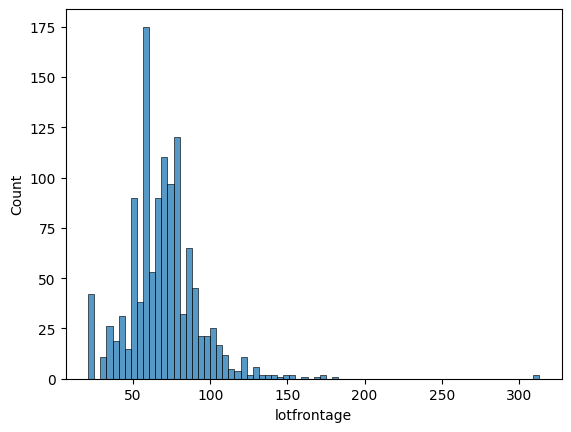

In [127]:
sns.histplot(df.lotfrontage)

In [128]:
df.lotfrontage = df.lotfrontage.fillna(df.lotfrontage.mean())

<Axes: xlabel='lotfrontage', ylabel='Count'>

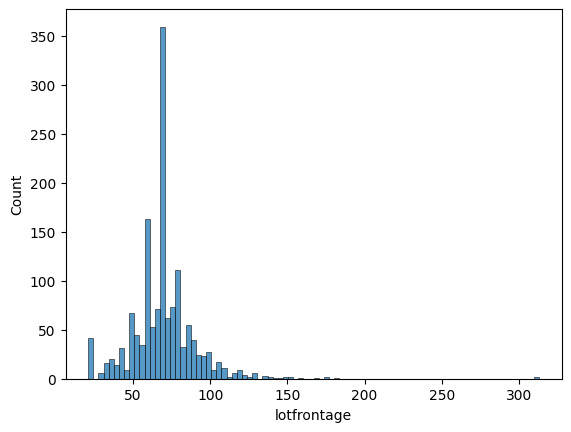

In [129]:
sns.histplot(df.lotfrontage)

In [130]:
 df.alley.unique()

array([nan, 'grvl', 'pave'], dtype=object)

In [131]:
df.alley = df.alley.fillna('na')

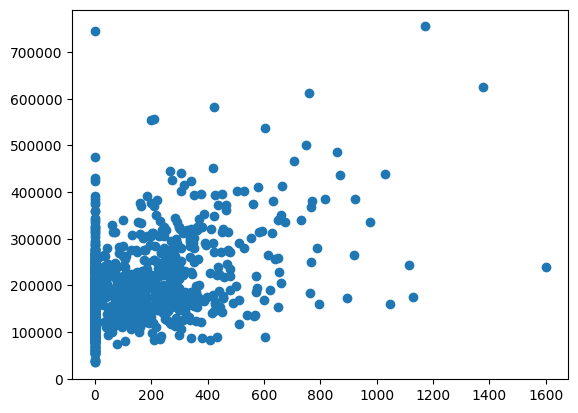

In [132]:
plt.scatter(df.masvnrarea, df.saleprice)
plt.show()
del df['masvnrtype']

In [133]:
df.masvnrarea = df.masvnrarea.fillna(df.masvnrarea.mean())

In [134]:
df.bsmtqual = df.bsmtqual.fillna('na')
df.bsmtcond = df.bsmtcond.fillna('na')

In [135]:
df.fireplacequ = df.fireplacequ.fillna('na')

In [136]:
df.fence = df.fence.fillna('na')

In [137]:
del df['miscfeature']

In [138]:
df.bsmtexposure = df.bsmtexposure.fillna('na')

In [139]:
df[['bsmtfintype1', 'bsmtfintype2']] = df[['bsmtfintype1', 'bsmtfintype2']].fillna('na')

In [140]:
df[['garagecond', 'garagequal', 'garagefinish', 'garageyrblt', 'garagetype']] = df[['garagecond', 'garagequal', 'garagefinish', 'garageyrblt', 'garagetype']].fillna('na')

In [141]:
indices_nulos = df[['poolqc', 'poolarea']][df.poolarea == 0].index
indices_nulos
df.loc[indices_nulos, 'poolqc'] = 'na'
df.poolqc.unique()

array(['na', 'ex', 'fa', 'gd'], dtype=object)

<Axes: xlabel='electrical', ylabel='Count'>

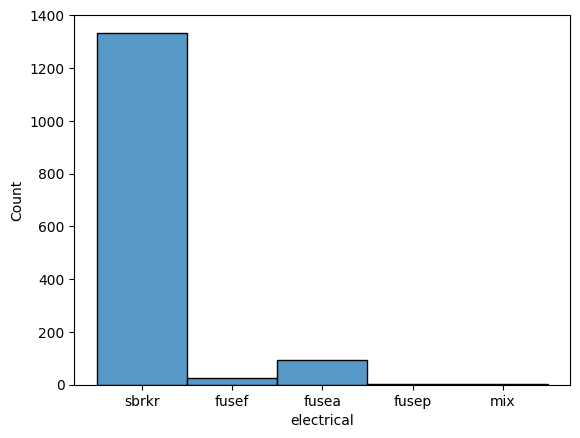

In [142]:
sns.histplot(df.electrical)

In [143]:
df.electrical = df.electrical.fillna('sbrkr')

In [144]:
df = df.reset_index(drop=True)

In [145]:
# feature engeniere
df['age'] = df.yearbuilt.max() - df.yearbuilt

## 5. One hot encoding

Para tratar las variables categoricas, utilicé la tecnica "one hot encoding". Elegí está tecnica debido a que el llenado de datos y las categorías que tienen se acomodan mejor para esta técnica. *"el factor humano también es importante"*

In [146]:
def one_hot_encoding(dataframe):
    df_encoded = pd.get_dummies(dataframe)
    for i in df_encoded.columns:
        if df_encoded[i].dtypes == 'bool':
            df_encoded[i] = df_encoded[i].astype(int)
    return df_encoded

In [147]:
df = one_hot_encoding(df)
df

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_cwd,saletype_new,saletype_oth,saletype_wd,salecondition_abnorml,salecondition_adjland,salecondition_alloca,salecondition_family,salecondition_normal,salecondition_partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


## Configuración del marco de validación

Se separan los datos para el entrenamiento, validación y test

In [148]:
n = len(df)
print(n)
n_val = int(n * 0.2)
n_test = n_val
n_train = n - (n_val + n_test)

1460


In [149]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [150]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [151]:
df_train

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_cwd,saletype_new,saletype_oth,saletype_wd,salecondition_abnorml,salecondition_adjland,salecondition_alloca,salecondition_family,salecondition_normal,salecondition_partial
503,504,20,100.0,15602,7,8,1959,1997,0.0,1247,...,0,0,0,1,0,0,0,0,1,0
101,102,60,77.0,9206,6,5,1985,1985,336.0,0,...,0,0,0,1,0,0,0,0,1,0
608,609,70,78.0,12168,8,6,1934,1998,0.0,428,...,0,0,0,1,0,0,1,0,0,0
1089,1090,120,37.0,3316,8,5,2005,2005,0.0,1039,...,0,0,0,1,0,0,0,0,1,0
819,820,120,44.0,6371,7,5,2009,2010,128.0,733,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,20,63.0,17423,9,5,2008,2009,748.0,1904,...,0,1,0,0,0,0,0,0,0,1
176,177,60,97.0,10029,6,5,1988,1989,268.0,831,...,0,0,0,1,0,0,0,0,1,0
740,741,70,60.0,9600,5,7,1910,2002,0.0,0,...,0,0,0,1,1,0,0,0,0,0
507,508,20,75.0,7862,6,5,2009,2009,0.0,27,...,0,1,0,0,0,0,0,0,0,1


In [152]:
assert len(df_train) + len(df_val) + len(df_test) == len(df)
len(df_train), len(df_val), len(df_test)

(876, 292, 292)

In [153]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [154]:
y_train = np.log1p(df_train.saleprice.values)
y_val = np.log1p(df_val.saleprice.values)
y_test = np.log1p(df_test.saleprice.values)

In [155]:
del df_train['saleprice']
del df_val['saleprice']
del df_test['saleprice']

In [156]:
len(y_train)

876

## Entramiento de la regresión lineal

### Parámetros de validación

Creación de las funciones con las que el modelo será evaludo para medir su efectividad

## RMSE

In [163]:
def rmse(y, y_pred):
    error = 0
    for i in range(len(y)):
        error += (y[i] - y_pred[i]) ** 2
    error = np.sqrt(error) / len(y)
    return error

## MAPE

In [164]:
def mape(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y)) * 100

## R-cuadrado

In [165]:
def r2_score(y, y_pred):
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Validación del modelo

Ejemplo de como se debe evaluar el modelo despues de entrenado

In [166]:
X_train = prepare_X(df_train)
# w0, w = train_linear_regression(X_train, y_train) matriz singular

X_val = prepare_X(df_val)
#y_pred = w0 + X_val.dot(w)

#rmse(y_val, y_pred)

In [167]:
def prepare_X(df):
    return df.values

In [168]:
X_train = prepare_X(df_train)
X_train

array([[504.,  20., 100., ...,   0.,   1.,   0.],
       [102.,  60.,  77., ...,   0.,   1.,   0.],
       [609.,  70.,  78., ...,   0.,   0.,   0.],
       ...,
       [741.,  70.,  60., ...,   0.,   0.,   0.],
       [508.,  20.,  75., ...,   0.,   0.,   1.],
       [571.,  90.,  74., ...,   0.,   1.,   0.]])

Definición de la función de entrenamiento

*esta definición fue hecha y demostrada en clase*

In [169]:
def train_linear_regression(X, y, r=0.001):
    x = X.copy()
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])
    xtx = x.T.dot(x)
    xtx = xtx + (r * np.eye(xtx.shape[0]))
    xtx_inv = np.linalg.inv(xtx)
    w_full = xtx_inv.dot(x.T).dot(y)
    return w_full[0], w_full[1:]

In [170]:
X_train = prepare_X(df_train)

In [171]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(0.7045887356218898),
 array([-9.55755868e-06, -3.65845727e-04,  5.08139735e-04,  1.07338688e-06,
         4.89911479e-02,  4.08881331e-02,  5.47428438e-03, -1.26380481e-04,
         4.56229694e-05,  2.33135635e-05,  7.88461465e-05, -2.23442836e-05,
         8.43503721e-05,  1.14009576e-04,  1.08048928e-04, -1.42008561e-04,
         7.31563225e-05,  3.20887153e-02, -5.92911956e-03,  3.56240797e-02,
         1.48223179e-02, -6.34737604e-03, -1.27076509e-01,  1.11289802e-02,
         1.76721654e-02,  1.06776735e-02,  1.58729940e-04,  8.18956820e-05,
         4.70157450e-05,  1.58852894e-04,  1.51242004e-04,  1.97803934e-04,
         1.15270582e-03, -1.71664403e-06, -1.70792578e-03, -8.53873233e-04,
         4.43489949e-03, -3.29376092e-01,  9.46968071e-02,  9.75016029e-02,
         8.51038362e-02,  5.20787791e-02,  2.23749949e-03, -2.23257829e-03,
        -7.34790343e-04, -4.73780645e-03,  5.47750665e-03, -3.68076629e-02,
        -1.32743181e-02,  7.00716536e-02, -1.99847422e-

In [172]:
X_val = prepare_X(df_val)
print(X_val.shape)
y_pred = w0 + X_val.dot(w)

(292, 392)


<Axes: ylabel='Count'>

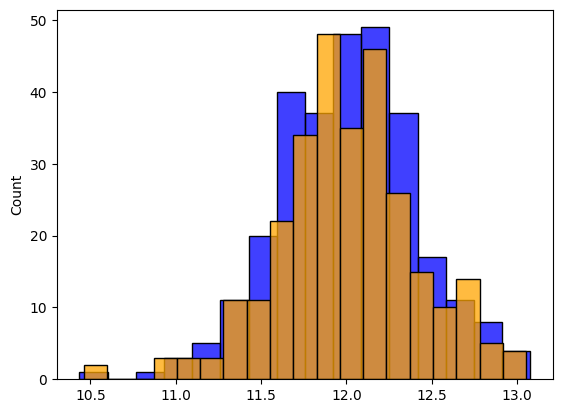

In [173]:
sns.histplot(y_pred, color='blue')
sns.histplot(y_val, color='orange')

In [174]:
y_pred_real = np.expm1(y_pred)
y_val_real = np.expm1(y_val)

<Axes: ylabel='Count'>

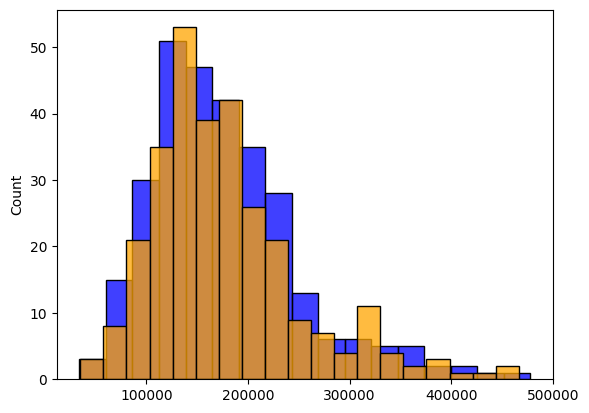

In [175]:
sns.histplot(y_pred_real, color='blue')
sns.histplot(y_val_real, color='orange')

In [176]:
rmse(y_val_real, y_pred_real)

np.float64(1306.7521088548137)

## Tuning the mode

Para mejorar la eficiencia de la regresión se buscan diferentes `r` para que la suma de la diferencia de los errores al cuadrado sea mínima

In [177]:
def tuning_model():
    X_val = prepare_X(df_val)
    y_val_real = np.expm1(y_val)
    min_error = 1000000000
    posibles_r = [10**i for i in range(-15, 15) if i != 0]
    for i in posibles_r:
        print(i)
        w0, w = train_linear_regression(X_train, y_train, r=i)
        y_pred = w0 + X_val.dot(w)
        y_pred_real = np.expm1(y_pred)
        error = rmse(y_val_real, y_pred_real)
        if error < min_error:
            min_error = error
            best_r = i
    return best_r

In [178]:
best_r = tuning_model()
best_r

1e-15
1e-14
1e-13
1e-12
1e-11
1e-10
1e-09
1e-08
1e-07
1e-06
1e-05
0.0001


/tmp/ipykernel_6862/2790998164.py:10: RuntimeWarning: overflow encountered in expm1
  y_pred_real = np.expm1(y_pred)
/tmp/ipykernel_6862/1330147675.py:4: RuntimeWarning: overflow encountered in scalar power
  error += (y[i] - y_pred[i]) ** 2


0.001
0.01
0.1
10
100
1000
10000
100000
1000000
10000000
100000000
1000000000
10000000000
100000000000
1000000000000
10000000000000
100000000000000


10

## Entrenamiento y prueba del modelo

Despues de hacer el tuning del modelo, 

Entrenamiento del modelo con el "mejor" `r`

In [179]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r=best_r)

RMSE: 1292.1159241315222
MAPE: 10.049477978815172
R-cuadrado, 0.9112384442594731


prueba del modelo con el dataset df_val (enterior mente reservado para la validación)

In [ ]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
y_pred_real = np.expm1(y_pred)
y_val_real = np.expm1(y_val)

validación de resultados

In [ ]:
print(f"RMSE: {rmse(y_val_real, y_pred_real)}")
print(f"MAPE: {mape(y_val_real, y_pred_real)}")
print(f"R-cuadrado, {r2_score(y_val_real, y_pred_real)}")

<Axes: ylabel='Count'>

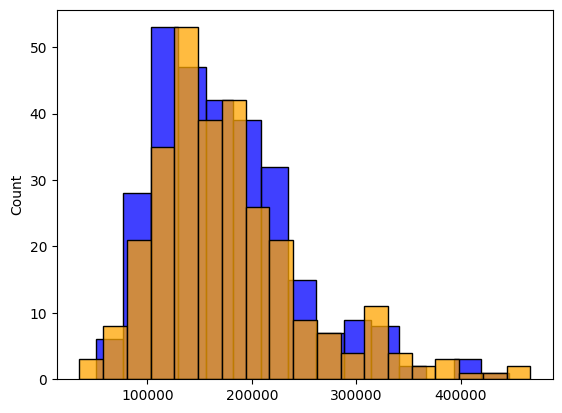

In [180]:
sns.histplot(y_pred_real, color='blue')
sns.histplot(y_val_real, color='orange')

prueba del modelo con el dataset df_test (enterior mente reservado para el testeo) *se "verifica" que no es suerte el ajuste*

In [181]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)

RMSE: 1343.1984348015444
MAPE: 8.477920413968695
R-cuadrado, 0.903078282015179


validación del modelo

In [ ]:
print(f"RMSE: {rmse(y_test_real, y_pred_real)}")
print(f"MAPE: {mape(y_test_real, y_pred_real)}")
print(f"R-cuadrado, {r2_score(y_test_real, y_pred_real)}")

<Axes: ylabel='Count'>

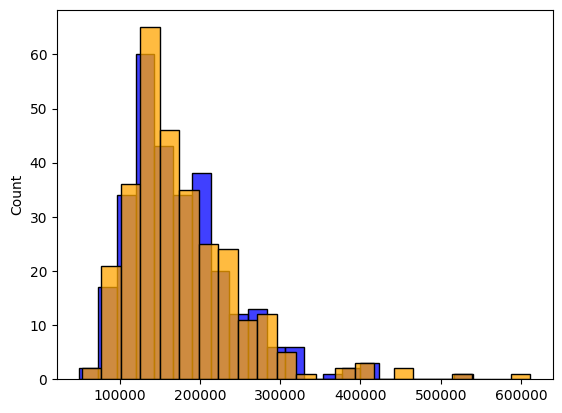

In [182]:
sns.histplot(y_pred_real, color='blue')
sns.histplot(y_test_real, color='orange')
#